# Test a Perceptual Phenomenon


Craig Nicholson  
September 4, 2015
* * *

In this project, you will investigate a classic phenomenon from experimental psychology called the Stroop Effect. You will learn a little bit about the experiment, create a hypothesis regarding the outcome of the task, then go through the task yourself. You will then look at some data collected from others who have performed the same task and will compute some statistics describing the results. Finally, you will interpret your results in terms of your hypotheses.

## Statistics: The Science of Decisions Project Instructions

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a **congruent** words condition, and an **incongruent** words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Imports

In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels as sm
from scipy.stats import ttest_ind

In [2]:
# display plot within the notebook rather than a new window
%pylab inline

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### Load the data

In [3]:
# load the stroopdata.csv
path = '~/Downloads/P1/stroopdata.csv'
df = pd.read_csv(path)

### Questions For Investigation

### 1. What is our independent variable? What is our dependent variable?
The **independant variable** is the word list. We vary the word list by having the color of the ink match the color of the 'word' and the the opposite, where the color or the ink does not match the color of the word.


The **dependant variable** is time it takes to say out loud the color of the ink in which the word is printed.

Clarification of dependant variable:  The time it takes (seconds) to say the color of the ink for the color words for the congruent and incongruent list is what is being measured.  

**[Notes]**  
*An independent variable, sometimes called an experimental or predictor variable, is a variable that is being manipulated in an experiment in order to observe the effect on a dependent variable, sometimes called an outcome variable.*
 
*The dependent variable is the variable being measured which is affected by the independent variable*

Reference:
[Laerd Statistics : Types of Variable](https://statistics.laerd.com/statistical-guides/types-of-variable.php)


### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Additional Notes:
Do we need one tail or two tail.   

**Null hypothesis**  
H0: μd = μ0  
The population mean of the differences (μd) equals the hypothesized mean of the differences (μ0).  

The null hypothesis, for this experiment would be the time it takes to say the color of the ink in the word lists takes approximately the same amount of time, on average, for the congruent and incongruent lists.  
A one tailed test woud be H0: μd >= μ0 

**Alternative hypothesis**

H1: μd < μ0  
The population mean of the differences (μd) is less than the hypothesized mean of the differences (μ0).  
*Use this for one tail test*

H1: μd ≠ μ0  
*Use this for two tail test*

The alternative hypothesis for a one tail test for this experiment would be the time it takes to say the color of the ink in the word lists takes much more larger amount of time, on average.

**Types of Statistical Tests **
The types of statistical test one can use depends on the type of data.  The data for the Stroop task is interval and relatively normal.  Our options are the following:

- paired t-test - one tail
- paired t-test - two tail
- z test

** Notes **  
μd - population  
μ0 - sample  

Tests whether the mean of the differences between dependent or paired observations is equal to a target value
http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/why-use-paired-t/

The Z test requires a sample size approximately greater than of equal 30 (n>=30).
Z test requires the mu and sigman... mean and standard deviation

Udacity - Lesson 10-  t-Distribution    
- z = use when you have mu and sigma, mu is the average of the entire population.
- for this data we do not have the Stroop Effect of every know subject.
- Our samples can be dependant or indepentant Lesson 10 is dependant samples

When working with samples we have to estimate the std dev using Bessiles correction
instead of n use n-1 for this stdev.s in excel.

t-distribution is more prone to error.

t test/scores are less accurate because they have a larger margin of error, they are more spread out.

the sames is dependant when the same subject takes the test twice.
- two conditions
- takes pre test, and then post test
- growth over time

This is a **repeated measured design** experiment.  
H0: μd = μ0  
diff between two keyboards  
diff between two word lists  

 
**Longitudinal**   
H0: μtime1 = μtime2  
measure the var. at one point in time and then measaure again at another point in time  
4 years of age and 8 years of age.

**pre-test post test**   
H0: μpre = μpost  
before a treatment, and after the treatment




** References**

[idre UCLA - What statistical analysis should I use?](http://www.ats.ucla.edu/stat/mult_pkg/whatstat/)     
[NIST - What are statistical tests?](http://www.itl.nist.gov/div898/handbook/prc/section1/prc13.htm)  
[Two-Sample t-Test for Equal Means](http://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm) 

http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/types-of-t-tests/




### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

#### Central Tendency
*Mean, Median, Mode, a histogram of both of the data sets measure the central tendency of a dataset.  The typical or middle value for the dataset.*

The mean for the congruent list is 14.05 with a median of 14.36.  

The mean for the incongruent list is 22.02 with a median of 21.02.

[Laerd Statistics : Measure of Centrral Tendancy ](https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php)

**Congruent Mean & Median **

In [4]:
# Get the mean and median for the Congruent list
# print Congruent results
print 'Mean:\t' + str( df['Congruent'].mean())
print 'Median:\t' + str(df['Congruent'].median())


Mean:	14.051125
Median:	14.3565


**Incongruent Mean & Median**

In [5]:
# Get the mean and median for the Incongruent list
# print Congruent results
print 'Mean:\t' + str(df['Incongruent'].mean())
print 'Median:\t' + str(df['Incongruent'].median())

Mean:	22.0159166667
Median:	21.0175


**Histograms for Congruent and Incongruent Lists**  
The histogram can help us visualize the central tendency and the mode for a dataset.  I have set the x axis to start at the same range for both histograms to show how the Incongruent List is right shifted on the x axis.


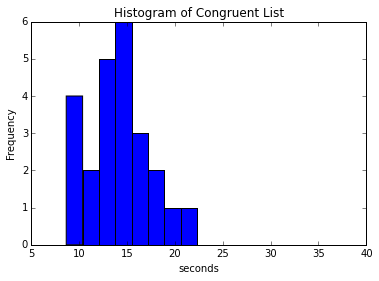

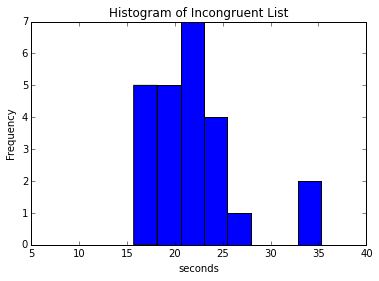

In [6]:
# Histogram of Congruent List
plt.hist(df['Congruent'], bins=8)
plt.title("Histogram of Congruent List")
plt.xlabel("seconds")
plt.ylabel("Frequency")
plt.axis(xmin=5, xmax=40)
# call plt.figure() so we get two distinct histograms
plt.figure()

# Histogram of Incongruent List
plt.hist(df['Incongruent'], bins=8)
plt.title("Histogram of Incongruent List")
plt.xlabel("seconds")
plt.ylabel("Frequency")
plt.axis(xmin=5, xmax=40)
plt.figure()

#### Measure of Variability?

The seconds for the Congruent list are less spread out and more likely normally distributed than the incongruent list whose data is right shifted.   The Incongruent list has a larger mean then the Congruent list.

Typically one can look at the range, quartiles and standard deviation to see the variability of the data.

**Range**
Incongruent list has a larger range than the congruent list.

In [7]:
dfStat = df.describe()
# Range
Congruent_R = dfStat['Congruent']['max'] - dfStat['Congruent']['min']
Incongruent_R = dfStat['Incongruent']['max'] - dfStat['Incongruent']['min']
print('Range of Congruent & Incongruent Lists',Congruent_R, Incongruent_R)

('Range of Congruent & Incongruent Lists', 13.698000000000002, 19.568000000000001)



**Interquartile Range (IQR)**  
IQR = 75% - 25%  

The data for the Incongruent IQR is slightly more spread out than the Congruent data.

In [8]:
# IQR
cIQR = dfStat['Congruent']['75%'] - dfStat['Congruent']['25%']
iIQR = dfStat['Incongruent']['75%'] - dfStat['Incongruent']['25%']
print 'IQR of Congruent :\t' + str(cIQR)
print 'IQR of Incongruent:\t' + str(iIQR)


IQR of Congruent :	4.3055
IQR of Incongruent:	5.33475


**Standard Deviation of the Congruent and Incongruent Lists**  
The Incongruent List has a larger standard deviation (1.35x larger than Congruent) so the values in the Incongruent list are spread farther out from the mean.

In [9]:
dfStat.iloc[[2]]

,Congruent,Incongruent
std,3.559358,4.797057


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Distribution plots are typically:  
- Histograms 
- Density
- Box

#### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2370358690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2343526150>]], dtype=object)

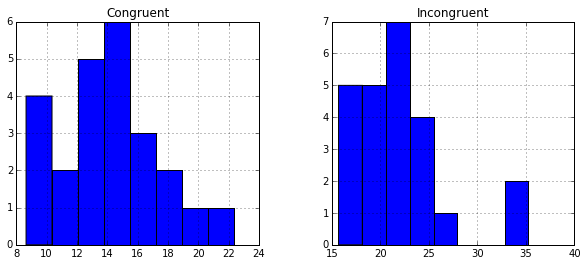

In [10]:
# Quick print of simple histograms
df.hist(bins=8,figsize=(10, 4))

The Congruent dataset is more likely normal than the incongruent dataset which seems to be skewed to the left, which is *postively skewed*.

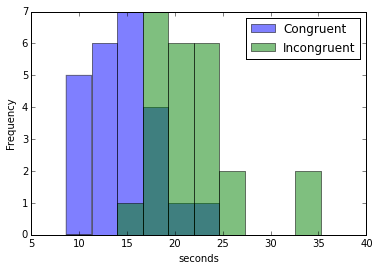

In [11]:
# Let's stack the histograms
df.plot(kind='hist', alpha=0.5)
plt.xlabel('seconds')
plt.ylabel('Frequency')

Stacking demonstrates the overlapping between the two datasets and how each is distrubted comparitively.  We can see over lapping occuring approximately around at 15 to 25 seconds with in a low frequency until we are approximately at 17.5 seconds where the freqeuncy is the highest (when overlapped) for both list at frequency of 4.

One can visually see it takes the sample population more time to read the color of the ink of the words for the incongruent list.

#### Density

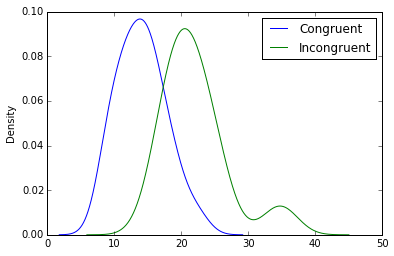

In [12]:
# this uses pyplot - fyi instead of the ggplot2
df.plot(kind='kde')

The curves are similar with the exception of the right shifted Incongruent curve due to the Stroop effect.  We can see the Incongruent normalized curve has a bump out to the right, due to the outliers.

> "In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample."

[Wikipedia - Kernal Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)


#### Combined Histogram and Normalized Plot


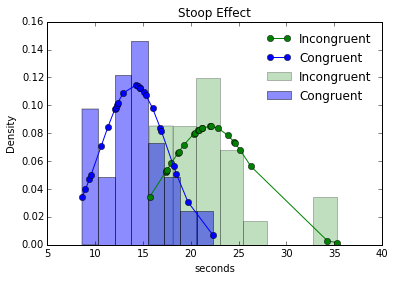

In [13]:
# Steps, to plot the normalized data  
# 1. sort the column ascending for the data 
# 2. pdf - apply the probability density function using the 
#      mean and standard deviation to new dataframe
#      http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# 3. plot the sorted seconds, along with the pdf
# 4. plot the histogram
# Incongruent = Greens
incog = df.sort(['Incongruent'], ascending=[1])
ifit = stats.norm.pdf(incog['Incongruent'], np.mean(incog['Incongruent']), np.std(incog['Incongruent']))
plt.plot(incog['Incongruent'],ifit,'-o',label='Incongruent', color='g')
plt.hist(incog['Incongruent'], bins=8, normed=True, alpha=0.25, label='Incongruent',color='g')

#Congruent - Blues
cog = df.sort(['Congruent'], ascending=[1])
cfit = stats.norm.pdf(cog['Congruent'], np.mean(cog['Congruent']), np.std(cog['Congruent']))
plt.plot(cog['Congruent'],cfit,'-o',label='Congruent',color='b')
plt.hist(cog['Congruent'], bins=8, normed=True, alpha=0.45, label='Congruent',color='b')
plt.title('Stoop Effect')
plt.xlabel('seconds')
plt.ylabel('Density')
plt.legend(loc='best', frameon=False)
# resize to show the distribution of the data
plt.figure(figsize(10,5))


This plot shows the effect of interference when the subject 'says' the color of ink when the word color is different than the ink color.   The goal here is to view the central tendency and variabilty in one plot.

#### Box Plots

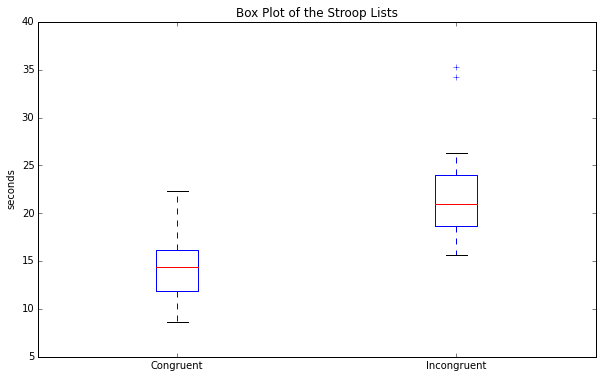

In [14]:
# print out simple box plot
df.plot(kind='box', figsize=(10,6))
plt.title('Box Plot of the Stroop Lists')
plt.ylabel("seconds")

Box plots show us the spread of the data, using the quartiles, median and the min and max points as well as the outliers for the data.  We can see above the Incongruent data has outliers around 35 seconds.

One can visually see it takes the sample population more time to read the color of the ink of the words for the incongruent list with the box plot.  We can even quickly see the medians are much different as well as the ranges for the congruent and incongruent datasets.

The data seems to be leading us to say it takes more time for a subject to say the color of the ink out loud when the color word is different than the color.

#### BarPlot

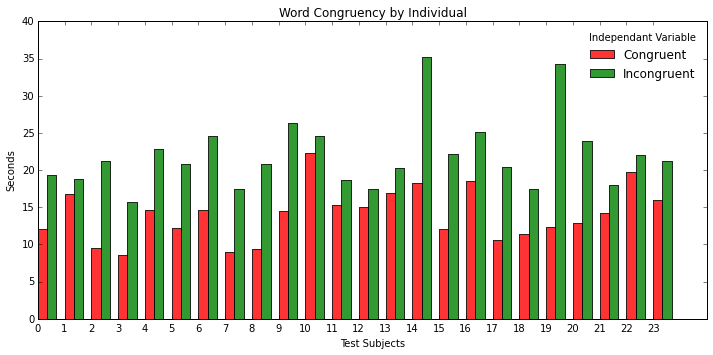

In [15]:
congruent_data = df['Congruent']
incongruent_data =df['Incongruent']

fig, ax = plt.subplots()

#index is equal to the individual ids
index = congruent_data.index.values
bar_width = 0.35
opacity = 0.8

p1 = plt.bar(congruent_data.index.values, congruent_data, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Congruent')

p2 = plt.bar(incongruent_data.index.values + bar_width, incongruent_data, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Incongruent')

plt.xlabel('Test Subjects')
plt.ylabel('Seconds')
plt.title('Word Congruency by Individual')
plt.legend(loc='best', frameon=False, title='Independant Variable')
xticks( congruent_data.index.values )

plt.tight_layout()
plt.show()

The barplot shows is a good representation of how the incongruent word list time to completion is much larger than the congruent word lists.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

For Paired t, the hypotheses are:  

**Null hypothesis**  
H0: μd = μ0  
The population mean of the differences (μd) equals the hypothesized mean of the differences (μ0).  

**Alternative hypothesis**  

Choose one:
**
H1: μd ≠ μ0  
The population mean of the differences (μd) does not equal the hypothesized mean of the differences (μ0).  
**  
*Two tailed test*


H1: μd > μ0	  
The population mean of the differences (μd) is greater than the hypothesized mean of the differences (μ0).    
*One tailed test*

H1: μd < μ0  
The population mean of the differences (μd) is less than the hypothesized mean of the differences (μ0).   
*One tailed test*


*Notes*
> If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages. Small p-values are associated with large t-statistics.

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html


#### Confidence Interval

Reference:
[NIST | 1.3.5.2. Confidence Limits for the Mean](http://www.itl.nist.gov/div898/handbook/eda/section3/eda352.htm)

In [16]:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
# Congruent POPULATION - Population Distribution
n = df['Congruent'].count()
mu = stats.tmean(df['Congruent'], limits=None, inclusive=(True, True))
sd_pop = stats.tstd(df['Congruent'], limits=None, inclusive=(True, True))

print 'POPULATION - Congruent'
print 'n \t\t\t\t = ' + str(n)
print 'MEAN (mu) \t\t\t = ' + str(mu)
print 'STANDARD DEVIATION \t\t = ' + str(sd_pop)
print '\n'

# INCONGRUENT SAMPLE - Sampling Distribution
n_sample = df['Incongruent'].count()
# xbar is the sample mean
xbar = stats.tmean(df['Incongruent'], limits=None, inclusive=(True, True))
sd_sample = stats.tstd(df['Incongruent'], limits=None, inclusive=(True, True))
# Standard error is the sigma of pop / sqrt(sample number)
# for the sampling distribution
SE = sd_pop/np.sqrt(n_sample)

print 'SAMPLE - Incongruent'
print 'n \t\t\t\t = ' + str(n_sample)
print 'MEAN (xbar) \t\t\t = ' + str(xbar)
print('STANDARD DEVIATION \t\t = ' + str(sd_sample))
# STANDARD ERROR OF THE MEAN
# SE = standard deviation pop / sqrt(sample size) - most common
print('STANDARD ERROR OF THE MEAN\t = ' + str(sd_pop/np.sqrt(n_sample)))
#print('Thus, a 95% confidence interval for the mean is:\n(' + str(m-h) + ' ,'+str(m+h)+')')
print 'DEGREES OF FREEDOM \t\t = ' + str(n_sample-1) 
print '\n'      # new line

print 'CRITICAL VALUE(S)'
# For the denominator - this is sometimes called standard error
# for both the z and t scores
# z-score = (xbar-mu) / SE
# OR
# z_score =  (xbar-mu) / (sd_pop / np.sqrt(n_sample))
z_score =  (xbar-mu) / (sd_pop / np.sqrt(n_sample))
print "The z-score is %.3f" % z_score

# t-score = (xbar-mu) / (sd_sample / np.sqrt(n_sample))
# double check this... 
t_statistic_calc = (xbar-mu) / (sd_sample / np.sqrt(n_sample))
print "The t-score is %.3f" % t_statistic_calc 
print '\n'      # new line

# CONFIDENCE INTERVALS - (Z Score - one tail)
# xbar + z_score * (mu/np.sqrt(n_sample))
# xbar - (z-score * SE), xbar + (z-score * SE)
ci_upper_05 = xbar + (1.65 * SE)
ci_lower_05 = xbar - (1.65 * SE)
ci_upper_01 = xbar + (2.32 * SE)
ci_lower_01 = xbar - (2.32 * SE)
ci_upper_001 = xbar + (3.08 * SE)
ci_lower_001 = xbar - (3.08 * SE)

# CONFIDENCE INTERVALS - (t Score - one tail)
# use sample std / sqrt(n)


# Margin of error
# 1/2 width of the confidence interval
margin_of_error_05 = (ci_upper_05-ci_lower_05)/2.0
margin_of_error_01 = (ci_upper_01-ci_lower_01)/2.0
margin_of_error_001 = (ci_upper_001-ci_lower_001)/2.0

print 'Z SCORE CI'
print "95%% CI for mean difference (%s, %s) \t" % (ci_lower_05, ci_upper_05)
print "Margin of Error: \t%s" % margin_of_error_05

print "99%% CI for mean difference (%s, %s) \t" % (ci_lower_01, ci_upper_01)
print "Margin of Error: \t%s" % margin_of_error_01

print "99.9%% for mean difference CI (%s, %s) \t" % (ci_lower_001, ci_upper_001)
print "Margin of Error: \t%s" % margin_of_error_001
print '\n'      # new line

POPULATION - Congruent
n 				 = 24
MEAN (mu) 			 = 14.051125
STANDARD DEVIATION 		 = 3.55935795765


SAMPLE - Incongruent
n 				 = 24
MEAN (xbar) 			 = 22.0159166667
STANDARD DEVIATION 		 = 4.79705712247
STANDARD ERROR OF THE MEAN	 = 0.726550900679
DEGREES OF FREEDOM 		 = 23


CRITICAL VALUE(S)
The z-score is 10.962
The t-score is 8.134


Z SCORE CI
95% CI for mean difference (20.8171076805, 23.2147256528) 	
Margin of Error: 	1.19880898612
99% CI for mean difference (20.3303185771, 23.7015147562) 	
Margin of Error: 	1.68559808957
99.9% for mean difference CI (19.7781398926, 24.2536934408) 	
Margin of Error: 	2.23777677409




## Another Way - Lesson 10

In [17]:
diff= df
diff['diff'] = diff['Congruent']-diff['Incongruent']

In [56]:
diff_n = diff['diff'].count()
diff_con_mean = stats.tmean(diff['Congruent'], limits=None, inclusive=(True, True)) 
diff_incog_mean = stats.tmean(diff['Incongruent'], limits=None, inclusive=(True, True)) 
diff_mean = stats.tmean(diff['diff'], limits=None, inclusive=(True, True)) 

# tests - this needs to be sd of a sample, and it is
diff_sd = stats.tstd(df['diff'], limits=None, inclusive=(True, True))

# test calc here
diff['diff_mean_var']  = diff['diff']-diff_mean
diff['squared_diff'] = np.square(df['diff_mean_var'])
diff_sum = diff['squared_diff'].sum()
diff_sd_sample_mean = (diff_sum / (diff_n-1))
diff_sd_check = np.sqrt(diff_sd_sample_mean)

point_estimate = diff_incog_mean - diff_con_mean 
diff_t_statistic = point_estimate / (diff_sd /  np.sqrt(diff_n))
cohens_d = point_estimate / diff_sd
# t table look up for 23 df, 
# https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg
#ν           0.90    0.95   0.975    0.99   0.995   0.999
# 23.       1.319   1.714   2.069   2.500   2.807   3.485

# 0.05 alpha 1.714, one tail
# 0.025 alpha 2.069, two tail

# 0.01 alpha 2.500, one tail
# 0.005 alpha 2.807, two tail

# 0.001 alpha 3.485, one tail
# 0.0005 alpha 3.768, two tail
lower_CI = point_estimate - (2.069 * (diff_sd / np.sqrt(diff_n)))
upper_CI = point_estimate + (2.069 * (diff_sd / np.sqrt(diff_n)))

print 'H0: Ui - Uc <= 0'
print 'HA: Ui - Uc > 0'
print '\n'
print 'SAMPLE SIZE:n \t\t\t\t  %.5f' % diff_n
print 'congruent mean %.5f' % diff_con_mean
print 'incongruent mean %.5f' % diff_incog_mean
print 'diff mean %.5f' % diff_mean
print 'diff_sd %.5f' % diff_sd

print '\ntests for std dev of pop\n'
print 'diff_sum %.5f' % diff_sum
print 'diff_sd_sample_mean %.5f' % diff_sd_sample_mean
print 'diff_sd_check %.5f' % diff_sd_check
print 'got it \n'

print 'point_estimate %.5f' % point_estimate
print 'diff_t_statistic %.5f' % diff_t_statistic
print 'cohens_d  %.5f' % cohens_d
print '95%% CI  for the mean difference: (%.5f, %.5f)' % (lower_CI,upper_CI)

lower_CI = point_estimate - (3.768 * (diff_sd / np.sqrt(diff_n)))
upper_CI = point_estimate + (3.768 * (diff_sd / np.sqrt(diff_n)))
print '99.9%% CI  for the mean difference:  (%.5f, %.5f)' % (lower_CI,upper_CI)

cSE = (sd_pop/np.sqrt(diff_n))
iSE = (sd_sample/np.sqrt(diff_n))
dSE = (diff_sd/np.sqrt(diff_n))

print '\n'
print '\t\tn\tmean\tStDev\tSE Mean'
print 'Congruent\t%.2f\t%.2f\t%.2f\t%.2f' % (diff_n,diff_con_mean,sd_pop,cSE)
print 'Incongruent\t%.2f\t%.2f\t%.2f\t%.2f' % (diff_n,diff_incog_mean,sd_sample,iSE)
print 'Difference\t%.2f\t%.2f\t%.2f\t%.2f' % (diff_n,diff_mean,diff_sd,dSE)
print '\n'
print '99.9%% CI  for the mean difference:  (%.5f, %.5f)' % (lower_CI,upper_CI)
print 'T-Test for the mean difference <= 0 (vs > 0) : T-Value: %.2f P-Value: %2.f ' % (diff_t_statistic,0.000000041 )



H0: Ui - Uc <= 0
HA: Ui - Uc > 0


SAMPLE SIZE:n 				  24.00000
congruent mean 14.05112
incongruent mean 22.01592
diff mean -7.96479
diff_sd 4.86483

tests for std dev of pop

diff_sum 544.33044
diff_sd_sample_mean 23.66654
diff_sd_check 4.86483
got it 

point_estimate 7.96479
diff_t_statistic 8.02071
cohens_d  1.63722
95% CI  for the mean difference: (5.91022, 10.01937)
99.9% CI  for the mean difference:  (4.22306, 11.70652)


		n	mean	StDev	SE Mean
Congruent	24.00	14.05	3.56	0.73
Incongruent	24.00	22.02	4.80	0.98
Difference	24.00	-7.96	4.86	0.99


99.9% CI  for the mean difference:  (4.22306, 11.70652)
T-Test for the mean difference <= 0 (vs > 0) : T-Value: 8.02 P-Value:  0 


The above math matches scipy.  Woo hoo.

In [29]:
# t-test via scipy 
# returns t-statistic and two-tailed p-value
paried_t_test_results = stats.ttest_rel(df['Incongruent'],df['Congruent'])
t_statistic = paried_t_test_results[0]
p_value = paried_t_test_results[1]
print "The t-statistic is %.5f and the p-value is %.9f" % paried_t_test_results


The t-statistic is 8.02071 and the p-value is 0.000000041


In [35]:
# code up the t-test check for H0 rejection
# Reject the null hypo when p value is less than probility of alpha's
# p-values from stats.ttest_rel is 2 tail
rejection = False   # monitor rejection based on p-values
result    = ''      # setup output
if p_value < 0.025:
    rejection = True
    result ='p value %.9f is in the critical region for alpha level 0.025' % p_value
if p_value < 0.005:
    rejection = True
    result = 'p value %.9f is in the critical region for alpha level 0.005' % p_value
if p_value < 0.005:
    rejection = True
    result = 'p value %.9f is in the critical region for alpha level 0.0005' % p_value
else:
    print 'you lose'
    
print 'Rejection of H0: %s' % rejection    
print result    

Rejection of H0: True
p value 0.000000041 is in the critical region for alpha level 0.0005


### Conclusion

We **reject the null hypothesis** for our paired t-test because the absolute value of the test statistic (8.02) is greater than the critical value (3.768). 

A paired-samples t-test was run on a sample of 24 subjects to determine whether there was a statistically significant mean difference in time (seconds) between reading word lists of congruent and incongruent lists. Participants' incongruent reading time is higher (22.016 ± 4.797 seconds) than the congruent reading times (14.051 ± 3.559 seconds); a statistically significant mean increase of 8.65 (99.9% CI, 4.223, 11.707) seconds, t(23) = 8.02, p < .0005.

#### Type 1 and Type 2 Errors
Can I use the Type 1 and Type 2 Errors here - so I can get a chance to practive them?



### 6. What do you think is responsible for the effects observed? 

Based on the theories listed my pick is 'Selective Attention' and 'Parallel Distributed Processing'.

See Wikiepdia - The Stroop Effect | Wikiepdia - The Stroop Effect

### Can you think of an alternative or similar task that would result in a similar effect? 

Learning a new language and having to read the words in German and think of the translation back to English.  At the oncept of learning the language I would suppose one could have a 'Parallel Distributed Processing'  because we are reading and also processing and mapping the German word back to English and then mapping the English word back to it's meaning.



## References

[Pandas Documentation](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html)

[Wikiepdia - The Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect)


### Notes

Chart Examples and equations used to understand the math behind various methods in the python.

Re-using the variables is going to be a debuging pain when an error in the code occurs.  Need a better way or new variables per sample.

In [21]:
print 'z-score table'
print 'percents\t5%\t1%\t0.1%'
print 'alphas\t\t0.05\t0.01\t0.001'
print 'one tail\t1.65\t2.32\t3.08'
print 'two tail\t1.96\t2.575\t3.327'
print 'two prob.\t0.025\t0.0050\t0.0005'
print '%CI\t\t95%\t99%\t99.9%'
print '\n'      # new line

print 't-table values dof=23'
print 'com prob.\t0.975\t0.995\t0.9995'
print 'two tail\t0.05\t0.01\t0.001'
print '% CI\t\t95%\t99%\t99.9%'
print 'tscore\t\t2.069\t2.807\t3.768'
print '\n'      # new line

# t-scores need degrees of freedom to calculate the critical values
# Note:
# once data falls into this range we can reject the null hypothesis
# if the z-score of the samples mean is > the z-critcal value
#  we have evidence that the samples are different
#  the smaller the alpha the larger the evidence there is an affect

z-score table
percents	5%	1%	0.1%
alphas		0.05	0.01	0.001
one tail	1.65	2.32	3.08
two tail	1.96	2.575	3.327
two prob.	0.025	0.0050	0.0005
%CI		95%	99%	99.9%


t-table values dof=23
com prob.	0.975	0.995	0.9995
two tail	0.05	0.01	0.001
% CI		95%	99%	99.9%
tscore		2.069	2.807	3.768




In [22]:
# scipy standard error method mean (SE) ->  std deviation / sqrt(sample size)
# ddof = 1
print ' SE Congruent:  ' + str(stats.sem(df['Congruent'], axis=None, ddof=1))
print ' SE Incongruent:' + str(stats.sem(df['Incongruent'], axis=None, ddof=1))

 SE Congruent:  0.726550900679
 SE Incongruent:0.979195184753


#####  Charts

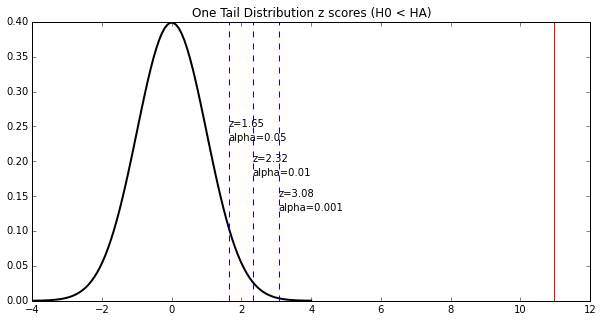

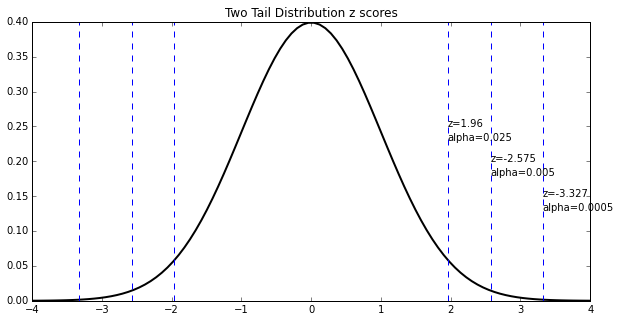

In [23]:
# setup the equation
mean = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(-4,4,100)  # define the length of the tail out to 4 std dev
                          # and population size of 100 to get normalized shape

plt.title('One Tail Distribution z scores (H0 < HA)')
plt.plot(x,mlab.normpdf(x,mean,sigma),'k-', lw=2)
plt.axvline(1.65, color='b', linestyle='dashed', linewidth=1)
plt.axvline(2.32, color='b', linestyle='dashed', linewidth=1)
plt.axvline(3.08, color='b', linestyle='dashed', linewidth=1)
plt.axvline(10.962, color='r', linestyle='solid', linewidth=1)
plt.text(1.65,  .25, r'z=1.65')
plt.text(1.65,  .23, r'alpha=0.05')
plt.text(2.32, .20, r'z=2.32')
plt.text(2.32, .18, r'alpha=0.01')
plt.text(3.08,  .15, r'z=3.08')
plt.text(3.08,  .13, r'alpha=0.001')
plt.show()

plt.title('Two Tail Distribution z scores')
plt.plot(x,mlab.normpdf(x,mean,sigma),'k-', lw=2)
plt.axvline(-1.96, color='b', linestyle='dashed', linewidth=1)
plt.axvline(1.96, color='b', linestyle='dashed', linewidth=1)
plt.axvline(-2.575, color='b', linestyle='dashed', linewidth=1)
plt.axvline(2.575, color='b', linestyle='dashed', linewidth=1)
plt.axvline(-3.327, color='b', linestyle='dashed', linewidth=1)
plt.axvline(3.327, color='b', linestyle='dashed', linewidth=1)
plt.text(1.96,  .25, r'z=1.96')
plt.text(1.96,  .23, r'alpha=0.025')
plt.text(2.575, .20, r'z=-2.575')
plt.text(2.575,  .18, r'alpha=0.005')
plt.text(3.327, .15, r'z=-3.327')
plt.text(3.327,  .13, r'alpha=0.0005')
plt.show()